# Reproduce this code

first download python libraries - pandas, numpy matplotlib, sklearn, xgboost, pathlib 

Also, you have to have the spotify song dataset and use random_state=1 to get the same results

And next you need to have jupyter notebook installed in the device and simply just upload the notebook and run each cell in chronological order. 

In [1]:
%pip install xgboost

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, mean_absolute_percentage_error




Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path
Data='/Users/ujjwalsharma/207 class/Homework /xgboost/spotifydata'
# adding dataset 
full_data = pd.read_csv(Path(Data) / 'data.csv')

In [3]:
print(full_data.head())
print(full_data.dtypes)
print(full_data.shape)

   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH      

# Loading the dataset and then checking size of it to understand the size and type of dataset

In [4]:
# checking if the dataset have any null values 

print(full_data.isnull().sum())

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64


# now i will try to check overview of the dataset to see what columns can i use to derive another column

In [5]:
full_data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


# first i will drop the ID because it is just raw identification number and do not give any assitance predictability

In [5]:
new_data=full_data.drop(['id'], axis=1)

# dropping name because raw text is high-cardinality and noisy and if we do one hot encoding it will expand the dataset to maximum scale

In [6]:
new_data=new_data.drop(['name'], axis=1)
print(new_data.head())

   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit  instrumentalness  key  liveness  loudness  \
0       831667   0.211         0          0.878000   10     0.665   -20.096   
1       180533   0.341         0          0.000000    7     0.160   -12.441   
2       500062   0.166         0          0.913000    3     0.101   -14.850   
3       210000   0.309         0          0.000028    5   

# now i will drop the relase_date because it is an object and it will cause cardinality issue because we already have year so we do not need to have 2 date time frames 

In [7]:
new_data=new_data.drop(['release_date'], axis=1)

# artist is an important feature and it will create issue if we remove it but if we add it then it will create cardinality issue, but i know usually if there are multiple artist the song does better so artist are important factor so i will add values 1 for 1 artist, 2 for 2 artist and 3 for 3 artist

In [8]:
# adding 1,2,3 for number of artists in artist column 
new_data['artists']=new_data['artists'].apply(lambda x: len(x.split(',')))


In [10]:
new_data['artists'].mean()

1.3349604167521227

In [11]:
new_data['artists'].head()

0    3
1    1
2    1
3    1
4    1
Name: artists, dtype: int64

# also we do not need to one hot encode the artist column because there is an order to it, 1 artist is smaller than 2 artists 

# Adding one Transformation Column 

# creating a new column called dance energy which will track the if the song is club song, chill, and laid back. Danceability is rhythmic stability, beat strength, tempo suitability. Energy is intensity/activeness (loud, bright, noisy). Dance energy high only when both are high—i.e., tracks that are both danceable and intense.


In [9]:
new_data["dance_energy"]   = new_data["danceability"] * new_data["energy"]

# the dataset is transformed now i will try to look for outlier using plots to see if anything is a outlier because usually outliers skew the dataset the tree based models can handle outliers but if it is an extreme outlier it would be better to remove them such as outliers due to human error.

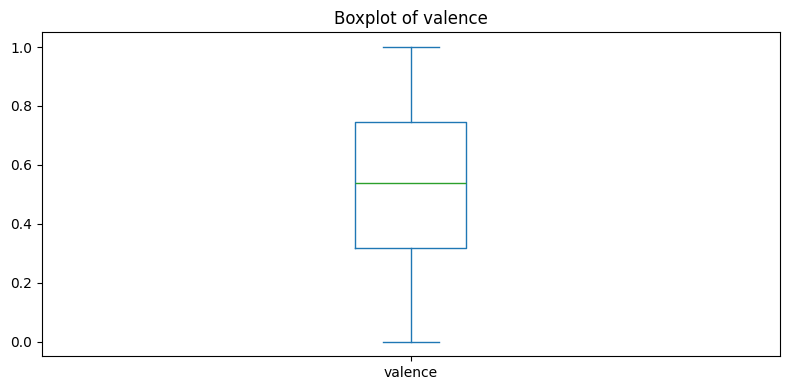

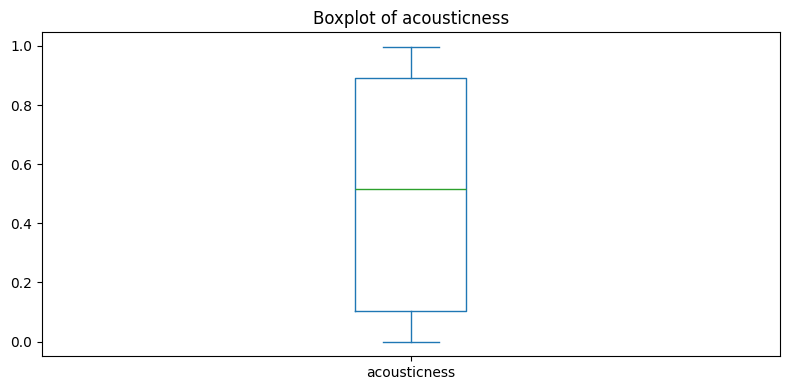

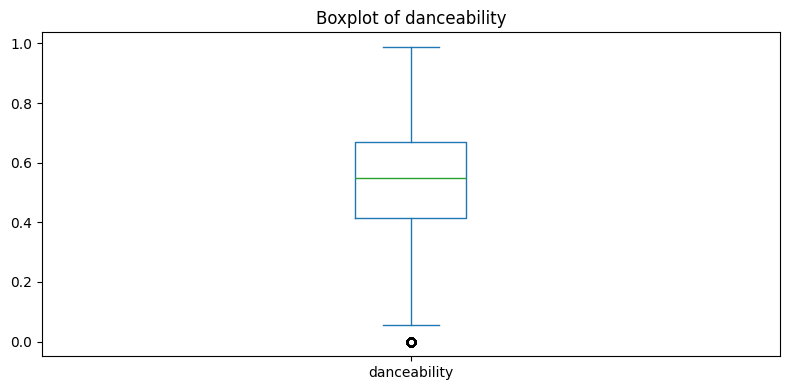

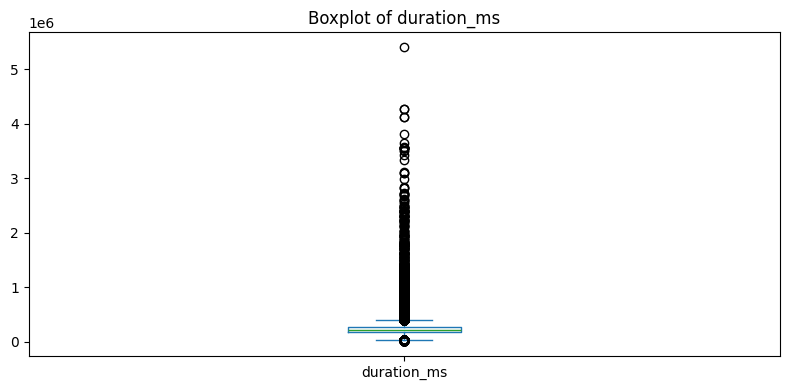

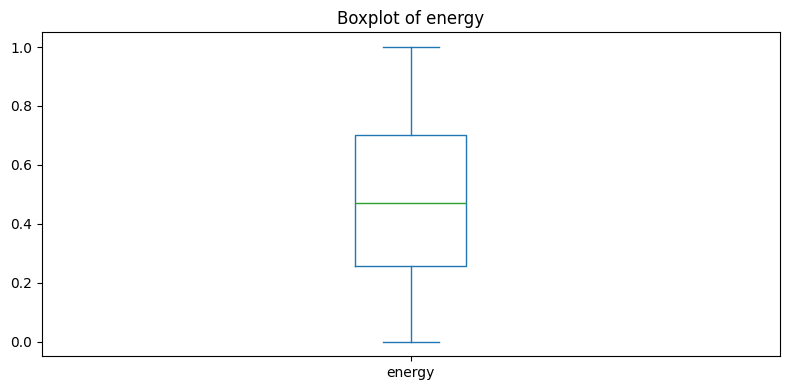

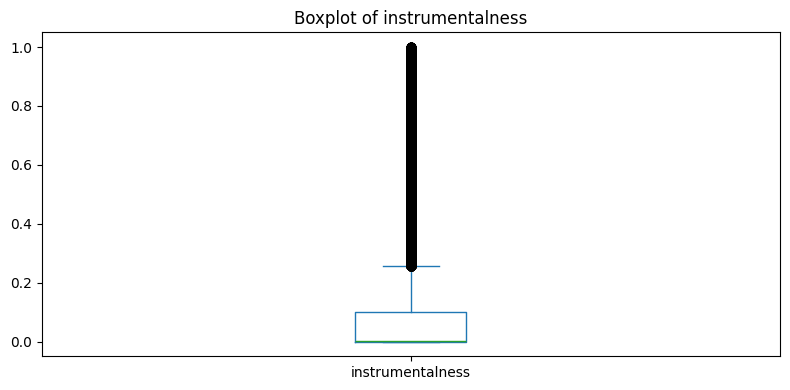

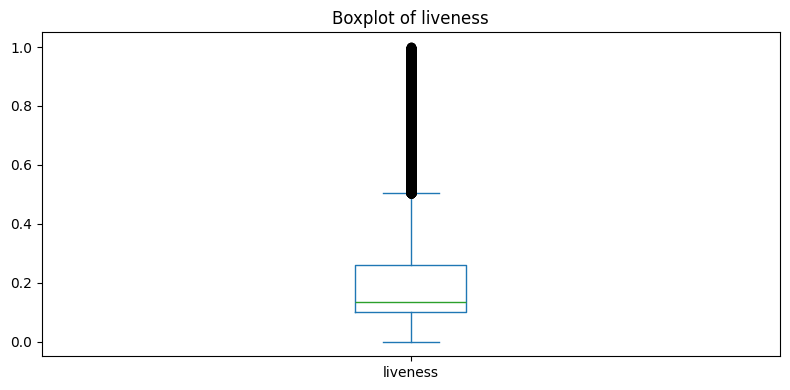

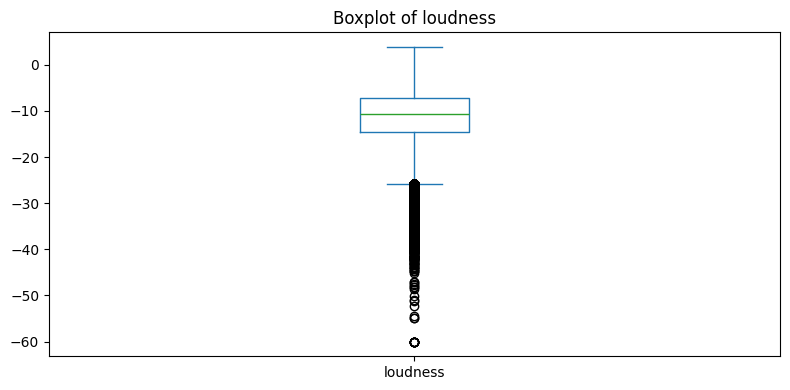

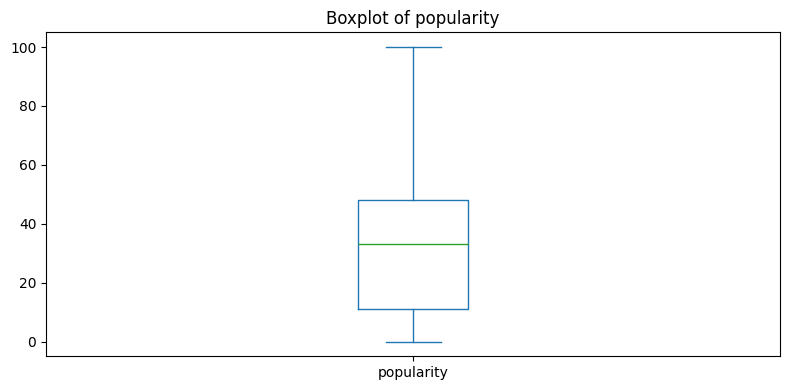

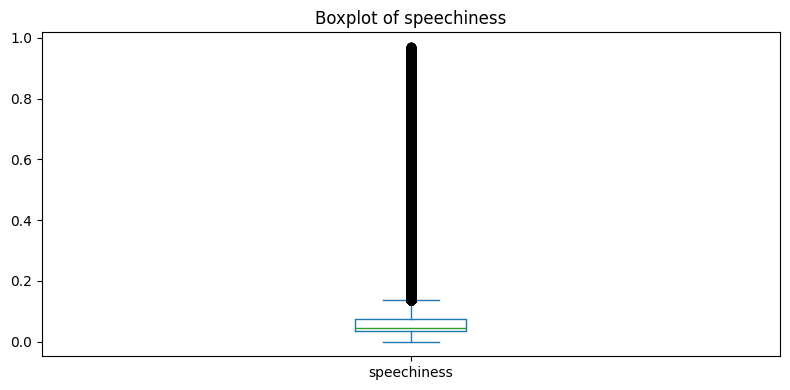

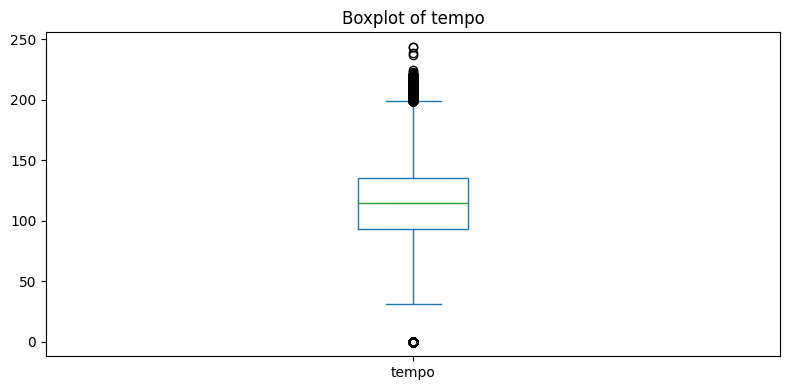

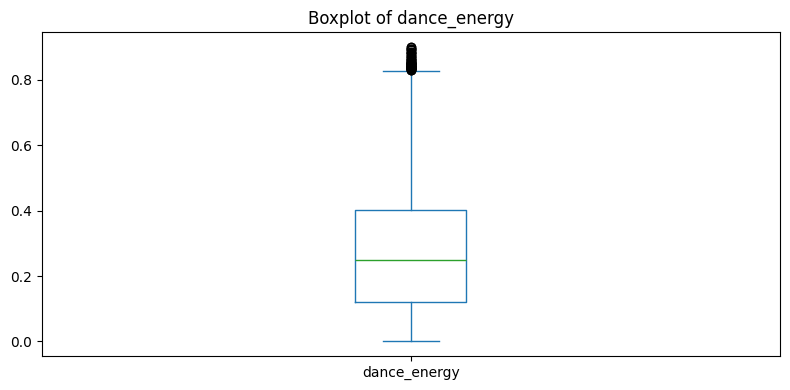

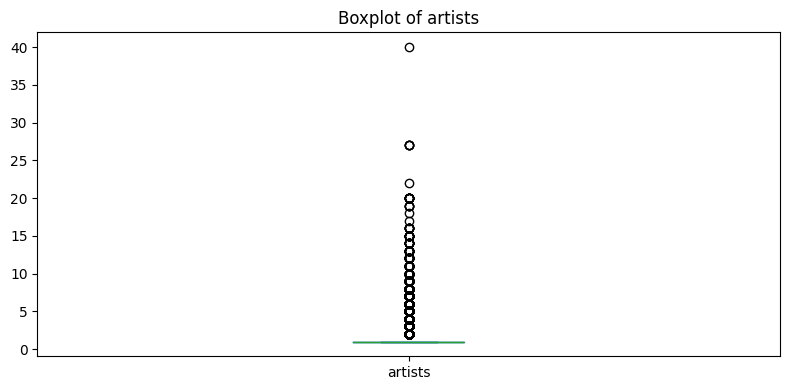

In [10]:
# Columns to check for outliers
cols_to_check = ['valence', 'acousticness', 'danceability', 'duration_ms', 
                 'energy', 'instrumentalness', 'liveness', 'loudness', 
                 'popularity', 'speechiness', 'tempo', 'dance_energy', 'artists']

# Create separate boxplots for each column
for col in cols_to_check:
    plt.figure(figsize=(8, 4))
    new_data[col].plot(kind='box')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()




# Tree based algorithm can handle outlier but if an outlier is on the extreme side then it means there was an error in the data.

# most of the columns have an outlier but there are few columns that have an extreme outlier which indicate there are so human error and those points are not valid.

# Such as **Artist** column has an outlier up to 40 which stands out on its own and **duration_ms** which has an outlier above 5 million

# so it would be better to just remove them. 

In [11]:
new_data.loc[new_data['artists'] > 25, 'artists'] = None
new_data.loc[new_data['duration_ms'] > 5000000, 'duration_ms'] = None


In [15]:
new_data.shape

(170653, 17)

# checking if the outliers were removed or not using graph

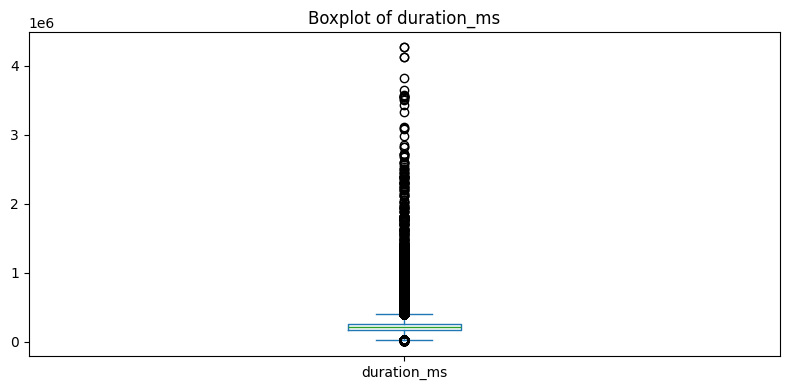

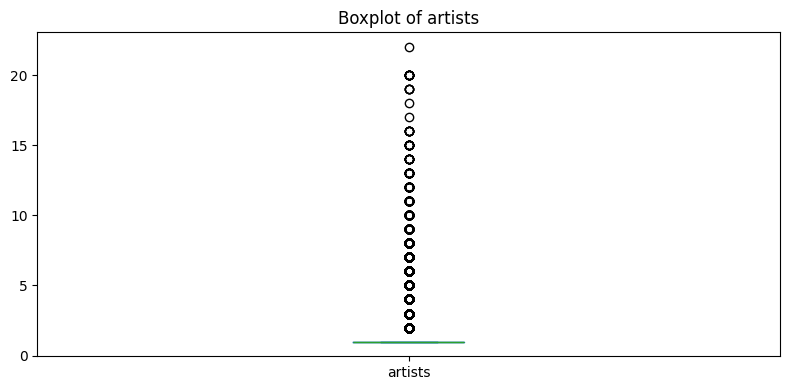

In [16]:
cols_to_check = ['duration_ms', 'artists']

# Create separate boxplots for each column
for col in cols_to_check:
    plt.figure(figsize=(8, 4))
    new_data[col].plot(kind='box')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# now we will check for skewness 

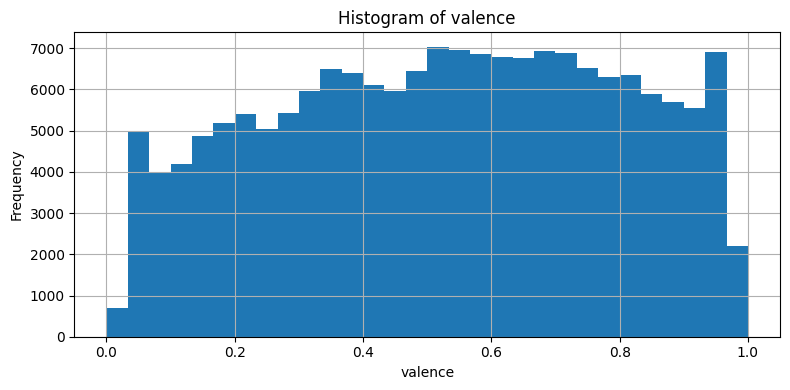

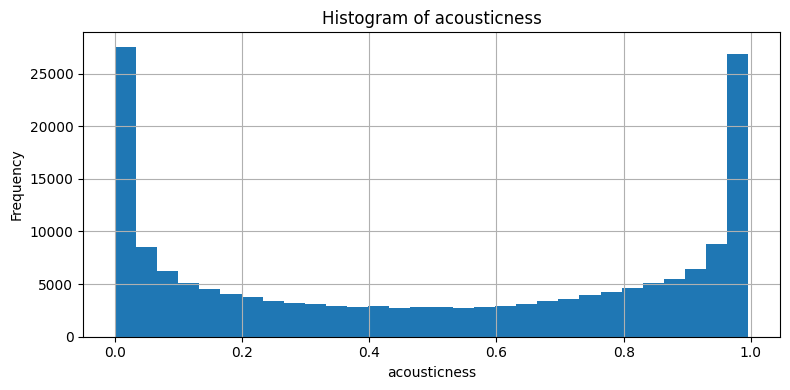

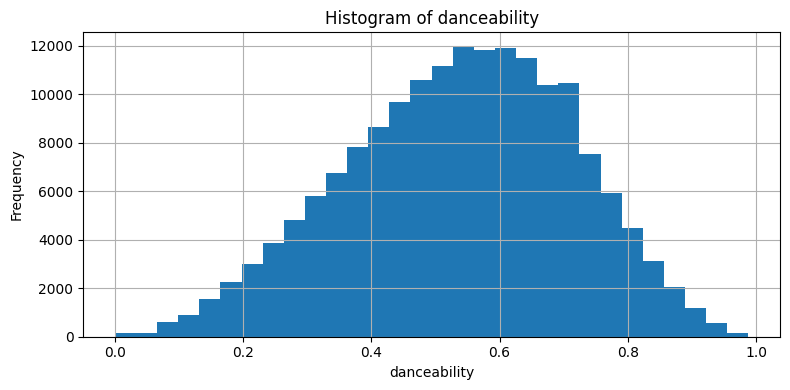

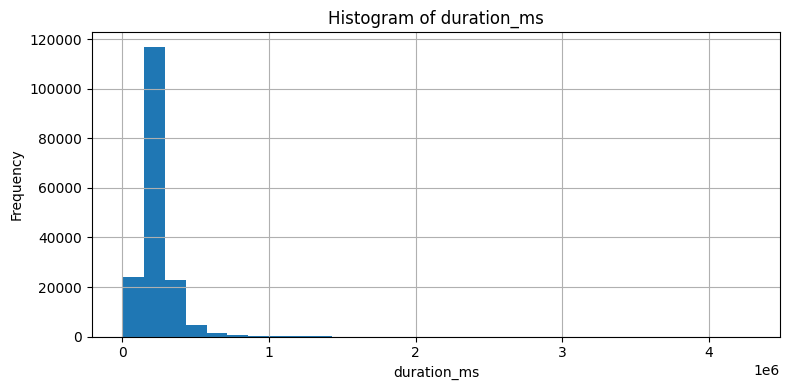

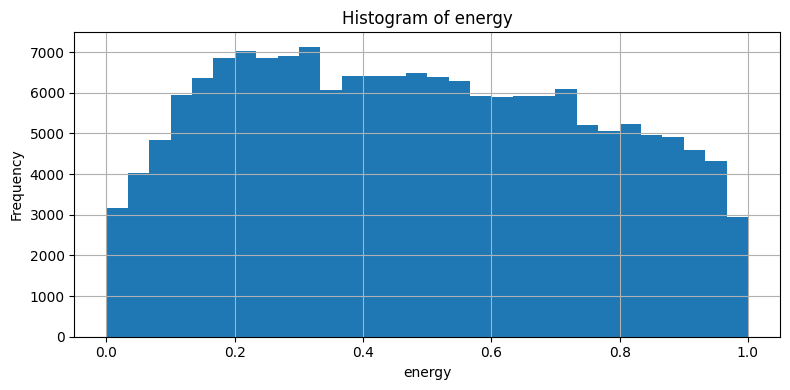

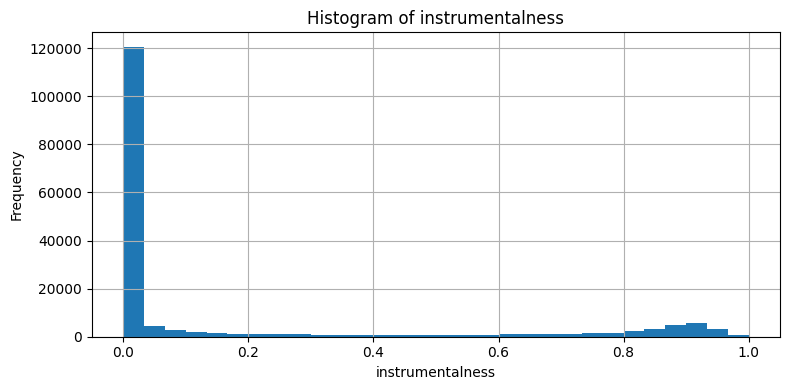

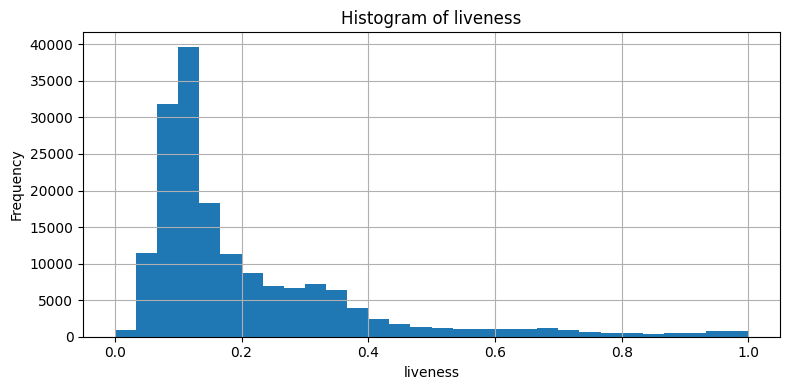

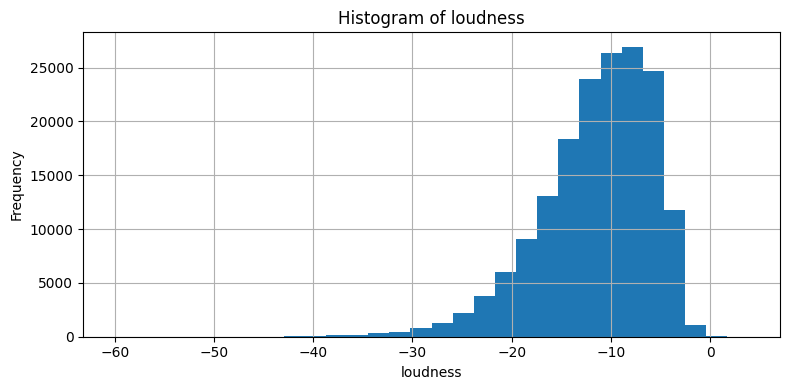

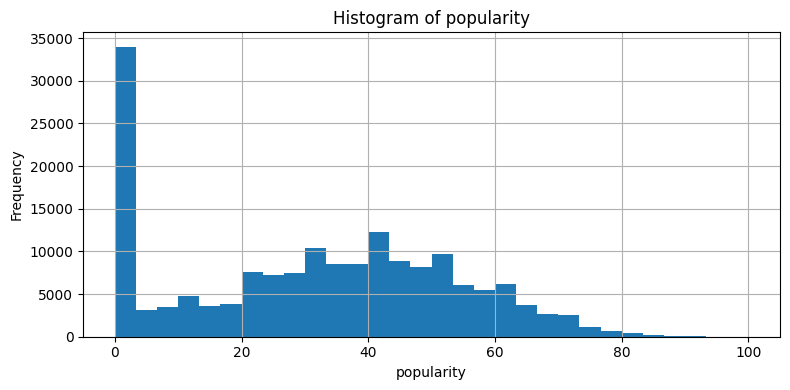

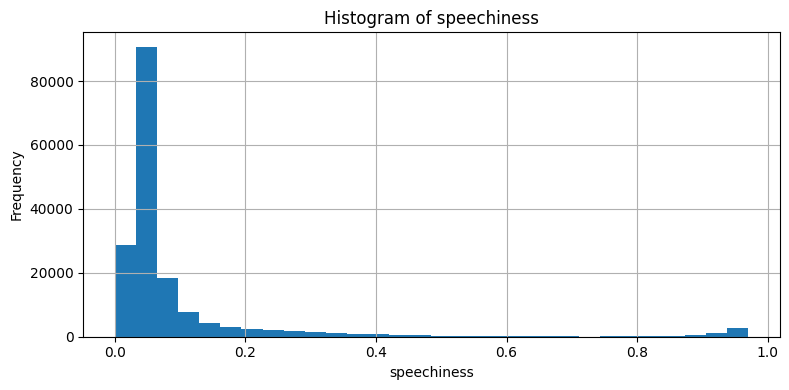

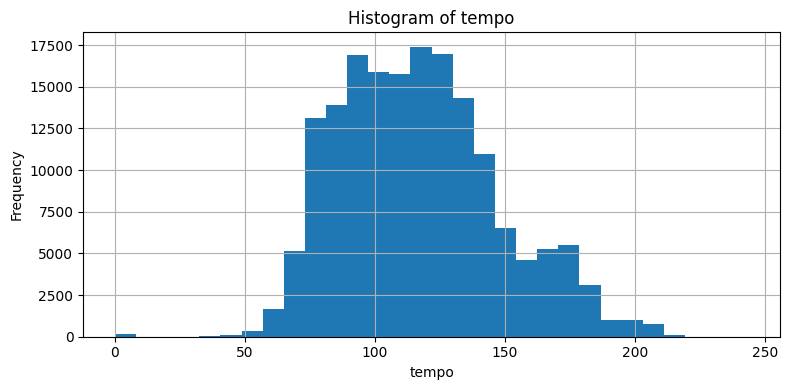

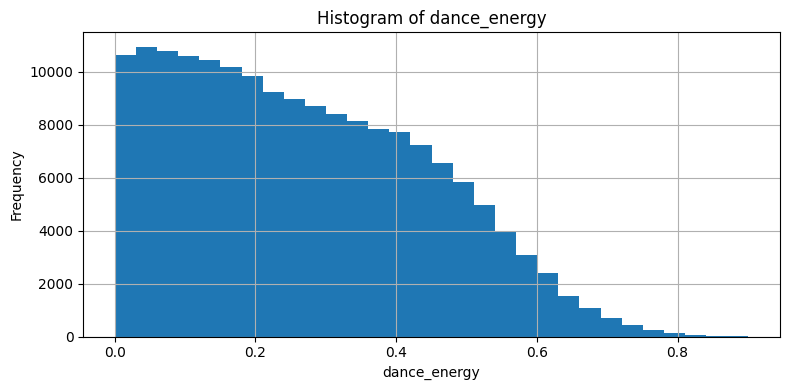

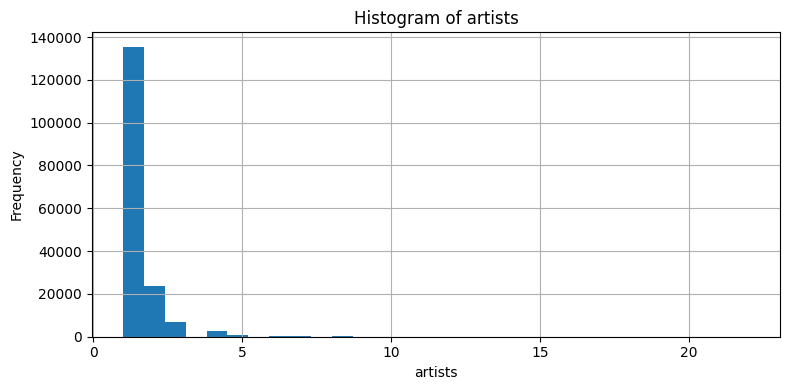

In [17]:
# Columns to check for skewness
cols_to_check = ['valence', 'acousticness', 'danceability', 'duration_ms', 
                 'energy', 'instrumentalness', 'liveness', 'loudness', 
                 'popularity', 'speechiness', 'tempo', 'dance_energy', 'artists']

# Create separate histograms for each column
for col in cols_to_check:
    plt.figure(figsize=(8, 4))
    new_data[col].hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# **Tree models make decisions by splitting data at threshold values, not by measuring distances or assuming a specific distribution. Tree-based models only care about the order and splits, not the actual values. Skewness and outliers don't affect them.**

# printing datatypes to check for columns to plot and remove for outliers 

In [18]:
new_data.dtypes

valence             float64
year                  int64
acousticness        float64
artists             float64
danceability        float64
duration_ms         float64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
popularity            int64
speechiness         float64
tempo               float64
dance_energy        float64
dtype: object

In [19]:
new_data['mode'].nunique()

2

In [20]:
new_data['explicit'].nunique()

2

In [21]:
new_data['key'].nunique()

12

# mode and explicit already has 2 values so we do not need to one hot encode it but key is a value which doesnt have a order necessarily 1 key is not bigger than 2 key so we will have to do one hot encoding on key value.

In [12]:
one_hot_data=pd.get_dummies(new_data, columns=['key'], drop_first=True)

print(one_hot_data.shape)

(170653, 27)


# Splitting the dataset into 60 percent training and 40 percent validation

In [13]:
X=one_hot_data.drop(columns=['popularity'])
y=one_hot_data['popularity']
 # spliting the data 40 percent for validation with a random state of 1 to reproduce the results
train_X, valid_X, train_y, valid_y = train_test_split(
    X, y, test_size=0.40, random_state=1)

# When i was running kernel kept crashing if i used alot of parameter so i used 1 or 2 parameters to run so it doesnt crash thats why u dont see alot of parameters 

# **Creating Bagging model using Hyperparameter tuning for the dataset.** 

In [22]:
# creating a grid for bagging classifer 
bagging_parameter_grid = {
    'n_estimators': [ 100, 200],
    'max_samples': [ 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
    'bootstrap': [True]
}

# implementing grid search with 5-fold cross-validation for bagging classifier
bagging_cv_regression = GridSearchCV(
    BaggingRegressor(random_state=1),  
    bagging_parameter_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
bagging_cv_regression.fit(train_X, train_y) # fitting the model

best_bagging_method = bagging_cv_regression.best_estimator_
print('Best Bagging parameters:', bagging_cv_regression.best_params_)

bag_pred_valid = best_bagging_method.predict(valid_X)

print('Validation dataset Results for Bagging Regressor:')
print(f"valid MSE: {mean_squared_error(valid_y, bag_pred_valid):.4f}")
print(f"valid R²: {r2_score(valid_y, bag_pred_valid):.4f}")
print(f"valid RMSE: {mean_squared_error(valid_y, bag_pred_valid):.4f}")

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Bagging parameters: {'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 200}
Validation dataset Results for Bagging Regressor:
valid MSE: 92.2887
valid R²: 0.8063
valid RMSE: 92.2887


In [23]:
bag_pred_train = best_bagging_method.predict(train_X)

print('Training dataset Results for Bagging Regressor:')
print(f"training MSE: {mean_squared_error(train_y, bag_pred_train):.4f}")
print(f"training R²: {r2_score(train_y, bag_pred_train):.4f}")
print(f"training RMSE: {mean_squared_error(train_y, bag_pred_train):.4f}")

Training dataset Results for Bagging Regressor:
training MSE: 19.1428
training R²: 0.9598
training RMSE: 19.1428


# Random Forest 

In [25]:
random_param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2'],
}
# implementing grid search with 5-fold cross-validation for random forest classifier
random_forest_cv = GridSearchCV(
    RandomForestRegressor(random_state=1),
    random_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
random_forest_cv.fit(train_X, train_y) # fitting the model

# getting the best estimator
best_random_forest = random_forest_cv.best_estimator_
print('Best RF params:', random_forest_cv.best_params_)

# Evaluate on validation
random_forest_valid = best_random_forest.predict(valid_X)

print('Validation dataset Results for Random Forest Regressor:')
print(f"valid MSE: {mean_squared_error(valid_y, random_forest_valid):.4f}")
print(f"valid R²: {r2_score(valid_y, random_forest_valid):.4f}")
print(f"valid RMSE: {mean_squared_error(valid_y, random_forest_valid):.4f}")

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best RF params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Validation dataset Results for Random Forest Regressor:
valid MSE: 92.9568
valid R²: 0.8049
valid RMSE: 92.9568


# training dataset Random Forest

In [26]:
random_pred_train = best_random_forest.predict(train_X)

print('Training dataset Results for Random Forest Regressor:')
print(f"training MSE: {mean_squared_error(train_y, random_pred_train):.4f}")
print(f"training R²: {r2_score(train_y, random_pred_train):.4f}")
print(f"training RMSE: {mean_squared_error(train_y, random_pred_train):.4f}")

Training dataset Results for Random Forest Regressor:
training MSE: 32.4249
training R²: 0.9319
training RMSE: 32.4249


# Feature importance Random Forest


Top 10 predictors: 
year                0.485175
acousticness        0.124916
loudness            0.062596
energy              0.061629
dance_energy        0.060289
duration_ms         0.036826
speechiness         0.032985
instrumentalness    0.027943
valence             0.021462
danceability        0.018497
dtype: float64


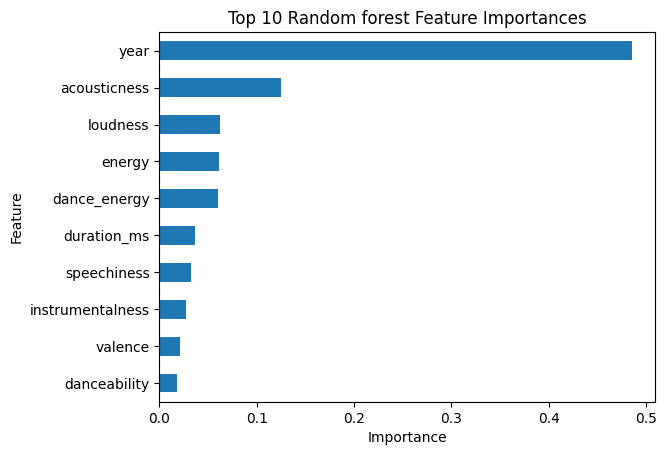

In [30]:
# Top 10 feature importances converting to series 
top5features_random = pd.Series(best_random_forest.feature_importances_, index=train_X.columns)
top5_sorted_random = top5features_random.sort_values(ascending=False).head(10)
print('\nTop 10 predictors: ')
print(top5_sorted_random)

# bar plot to show feature importance
top5_sorted_random.sort_values().plot(kind='barh',label=True)
plt.title('Top 10 Random forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# XGBoost Regressor 

In [18]:
# Define base model
xgb = XGBRegressor(random_state=1, eval_metric='rmse')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# Grid search
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(train_X, train_y)

# Evaluate best model
best_model_xgb = grid_search.best_estimator_
y_pred_xgb = best_model_xgb.predict(valid_X)

print("Best Hyperparameters:")
print(grid_search.best_params_)

print('Validation dataset Results for XGBoost Regressor:')
print(f"Valid MSE: {mean_squared_error(valid_y, y_pred_xgb):.4f}")
print(f"Valid R²: {r2_score(valid_y, y_pred_xgb):.4f}")
print(f"valid RMSE: {mean_squared_error(valid_y, y_pred_xgb):.4f}")


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters:
{'colsample_bytree': 1.0, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Validation dataset Results for XGBoost Regressor:
Valid MSE: 92.1942
Valid R²: 0.8065
valid RMSE: 92.1942


# Training Dataset results for XGBOOST

In [28]:
y_training_xgb = best_model_xgb.predict(train_X)
print('training dataset Results for XGBoost Regressor:')
print(f"training MSE: {mean_squared_error(train_y, y_training_xgb):.4f}")
print(f"training R²: {r2_score(train_y, y_training_xgb):.4f}")
print(f"training RMSE: {mean_squared_error(train_y, y_training_xgb):.4f}")

training dataset Results for XGBoost Regressor:
training MSE: 76.8790
training R²: 0.8386
training RMSE: 76.8790


# Feature Importance XGboost 


Top 10 predictors: 
year                0.796158
explicit            0.016064
instrumentalness    0.015764
duration_ms         0.015209
dance_energy        0.011668
loudness            0.009184
acousticness        0.008991
key_11              0.008632
danceability        0.008192
tempo               0.008129
dtype: float32


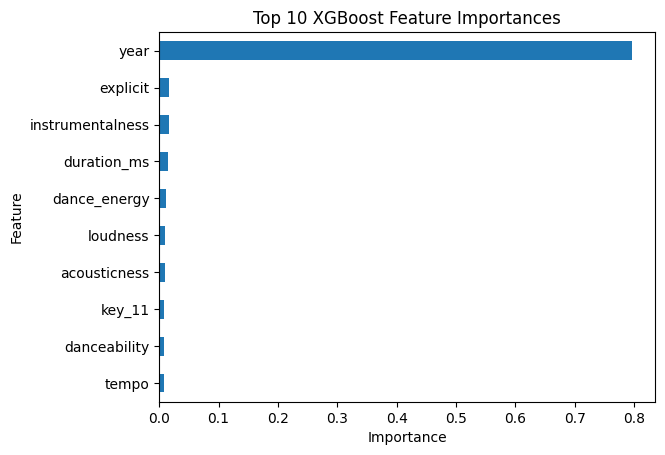

In [29]:
# Top 10 feature importances converting to series 
top5features_xgboost = pd.Series(best_model_xgb.feature_importances_, index=train_X.columns)
top5_sorted_xgboost = top5features_xgboost.sort_values(ascending=False).head(10)
print('\nTop 10 predictors: ')
print(top5_sorted_xgboost)

# bar plot to show feature importance
top5_sorted_xgboost.sort_values().plot(kind='barh',label=True)
plt.title('Top 10 XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Comparison 
Performance (validation): In terms of MSE, XGBoost piles up ahead above the other bagging and random forest approaches as refereed from 92.19, 92.29, and 92.96 respectively along with the R² statistic values of 0.8065 vs 0.8063 vs 0.8049, respectively. The differences may be minor, but they are consistent.

Interpretability: All three get to be tree ensembles with usual feature-importance devices. RF and Bagging avail of simple global importances. XGBoost also provides gain/weight importances and works very well with SHAP for local explanations.

Training time/efficiency: The differences in results have been made clear: XGBoost completed within minutes while RF/Bagging went beyond 40 minutes. This is a significant practical advantage in iterative modeling and hyperparameter tuning.

Robustness to overfitting: There is the biggest gap in between train and validation for Bagging (Train R² ≈ 0.96 vs Valid R² ≈ 0.81), indicating that it fits quite tightly to the training data. Random forest has a smaller gap (≈0.93 vs ≈0.80) consistent with the misconception of Random forest decorrelation of additional variance. The validation is slightly better for XGBoost without evidence of poorer generalization related to your summary; it usually checks overfitting rather well when tuned because of the inward regularization (learning rate, tree depth, subsampling, L1/L2).

# Recommendation 

Of your three models, I would pick XGBoost to be the one to ship. The best validation performance in notebook is given by the one that has Valid MSE ≈ 92.19, R² ≈ 0.8065, while the training time cost is extremely fast when compared to Bagging and Random Forest. That time is quite worthy because it allows systematic hyperparameter search, ablation, and robust cross-validation—these practical benefits over time lead to better models in comparison.

Interpretability is another plus. Random Forests and Bagging may be considered "simple" by almost anyone, while XGBoost holds support for global importances and SHAP for actual model explanations. In the runs, the big picture is pretty intuitive regardless of the ensemble: the year far dominates as a predictor; of the audio features, acousticness, loudness, and energy, along with interaction, dance_energy, also contribute.

On the robustness component, the training-validation discrepancies illustrate that the Bagging is the most optimistic on the training data (Train R² ≈ 0.96 vs Valid ≈ 0.81). The Random Forest reduces that gap, but it is still the slowest training in your environment. Typically, the XGBoost provides better bias-variance tradeoff through learning rate, depth, and subsampling; with fast training, you can then apply regularization until the validation begins to stabilize. Given noted validation results, there’s no evidence XGBoost is overfitting more than the alternatives; if anything, it looks like it’s slightly generalizing a little better.

To sum up, XGBoost gives the best accuracy-per-minute for your task, equal or better model generalization, adequate interpretability—all supported from the final metrics. I would continue to use XGBoost as the primary model, with Random Forest as a very least sanity-check, using permutation/SHAP plots to explain feature effects (particularly pointing out year, acousticness, loudness, energy, and dance_energy).

# **Select five songs from your personal playlist (not in the dataset) and manually estimate their feature values.**

# I will be using XGBoost to predict my personal songs below

I took few of my favorite songs and create a dataframe out of it for prediction below

In [43]:
df = pd.DataFrame({
    "song": [
        "shape of you",
        "A team",
        "beauty and a beat",
        "die with a smile",
        "uptown funk"
    ],
    "valence":        [0.62, 0.36, 0.66, 0.48, 0.94],
    "year":           [2017, 2011, 2012, 2024, 2014],
    "acousticness":   [0.14, 0.88, 0.03, 0.24, 0.06],
    "artists":        [1.0,  1.0,  2.0,  2.0,  2.0],
    "danceability":   [0.88, 0.49, 0.80, 0.29, 0.9],
    "duration_ms":    [235000.0, 243000.0, 227000.0, 201000.0, 269500.0],
    "energy":         [0.73, 0.28, 0.90, 0.57, 0.96],
    "explicit":       [0,    0,    0,    0,    0],
    "instrumentalness":[0.00, 0.01, 0.00, 0.00, 0.00],
    "liveness":       [0.11, 0.15, 0.12, 0.09, 0.23],
    "loudness":       [-5.8, -12.8, -4.2, -6.9, -4.1],
    "mode":           [1,    1,    1,    1,    1],
    "speechiness":    [0.09, 0.04, 0.08, 0.05, 0.07],
    "tempo":          [96.0, 85.0, 128.0, 108.0, 115.0],
    "dance_energy":   [0.6426, 0.1372, 0.72, 0.29, 0.89],


    # shape of you -> key_8 True
    # A team -> key_3 True
    # beauty and a beat -> key_6 True
    # die with a smile -> key_5 True
    # uptown funk -> key_7 True
    "key_1":  [False, False, False, False, False],
    "key_2":  [False, False, False, False, False],
    "key_3":  [False, True , False, False, False],
    "key_4":  [False, False, False, False, False],
    "key_5":  [False, False, False, True , False],
    "key_6":  [False, False, True , False, False],
    "key_7":  [False, False, False, False, True ],
    "key_8":  [True , False, False, False, False],
    "key_9":  [False, False, False, False, False],
    "key_10": [False, False, False, False, False],
    "key_11": [False, False, False, False, False],
})

In [37]:
df.dtypes

song                 object
valence             float64
year                  int64
acousticness        float64
artists             float64
danceability        float64
duration_ms         float64
energy              float64
explicit              int64
instrumentalness    float64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
dance_energy        float64
key_1                  bool
key_2                  bool
key_3                  bool
key_4                  bool
key_5                  bool
key_6                  bool
key_7                  bool
key_8                  bool
key_9                  bool
key_10                 bool
key_11                 bool
dtype: object

# dropping the song column because it is not in the model 

In [44]:
# dropping song column because it is not a feature 

df_new=df.drop(['song'], axis=1)

# predicting using xgboost for the 5 songs 

In [45]:
personal_song=best_model_xgb.predict(df_new)
print(personal_song)

[67.22795  51.844074 57.080627 62.716755 58.696087]


# Reflect on the predictions: Do they match your expectations? Why or why not?

Yes, at a general level, they tend to go along with what I would expect regarding a model of audio features + year. Shape of You ranks the highest here on the model because it's newer, it's loud, and it is very groove-oriented (high danceability/energy). A Team, then, is right at the lowest point, which is reasonable since it has such a very acoustic, low-energy profile, despite being a very well-known song. Beauty and a Beat just pops up there in that middle-high area with has strong club traits (high energy, 128 BPM), although its older year tempers the score. Die With a Smile is fairly high, mainly because of recency and mainstream pop traits, and Uptown Funk is a little lower than I would intuitively have expected- probably due to the model not picking up non-audio signals like artist fame, cultural impact, playlisting or virality, and Spotify's popularity metric being weighted over time, which can put older hits at a disadvantage. In short, the pattern corresponds well with what I provided based on features: recency and "groove" push scores up; acoustic/low-energy or age pull them down; and where my intuition differs (for instance, Uptown Funk), it is explained by missing non-audio context rather than a contradiction in the model's logic.
